In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 13.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller

**Import Data**

In [ ]:
df = pd.read_csv('/content/Electric_Production.csv',index_col=0, parse_dates=True)
X = df.values
print('Shape of data \t',df.shape)
print('Original Dataset: \n',df.head())
print('After Extracting only necessary values: \n',X)

Shape of data 	 (397, 1)
Original Dataset: 
             IPG2211A2N
DATE                  
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151
After Extracting only necessary values: 
 [[ 72.5052]
 [ 70.672 ]
 [ 62.4502]
 [ 57.4714]
 [ 55.3151]
 [ 58.0904]
 [ 62.6202]
 [ 63.2485]
 [ 60.5846]
 [ 56.3154]
 [ 58.0005]
 [ 68.7145]
 [ 73.3057]
 [ 67.9869]
 [ 62.2221]
 [ 57.0329]
 [ 55.8137]
 [ 59.9005]
 [ 65.7655]
 [ 64.4816]
 [ 61.0005]
 [ 57.5322]
 [ 59.3417]
 [ 68.1354]
 [ 73.8152]
 [ 70.062 ]
 [ 65.61  ]
 [ 60.1586]
 [ 58.8734]
 [ 63.8918]
 [ 68.8694]
 [ 70.0669]
 [ 64.1151]
 [ 60.3789]
 [ 62.4643]
 [ 70.5777]
 [ 79.8703]
 [ 76.1622]
 [ 70.2928]
 [ 63.2384]
 [ 61.4065]
 [ 67.1097]
 [ 72.9816]
 [ 75.7655]
 [ 67.5152]
 [ 63.2832]
 [ 65.1078]
 [ 73.8631]
 [ 77.9188]
 [ 76.6822]
 [ 73.3523]
 [ 65.1081]
 [ 63.6892]
 [ 68.4722]
 [ 74.0301]
 [ 75.0448]
 [ 69.3053]
 [ 65.8735]
 [ 69.0706]
 [ 84.1949]
 [ 84.3598]
 [ 77.1726]
 [ 73.19

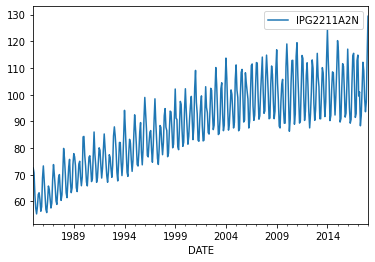

In [ ]:
df.plot()

**Check for Stationarity**

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC') #AIC: Method to use when automatically determining the lag length among the values 0, 1, …, maxlag
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value #Critical values for the ADF test for 1, 5, and 10% significance levels with the constant model are −3.43, −2.87, and −2.57, respectively.
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")
        

In [ ]:
Augmented_Dickey_Fuller_Test_func(df['IPG2211A2N'], 'value')

Results of Dickey-Fuller Test for column: value
Test Statistic                  -2.256990
p-value                          0.186215
No Lags Used                    15.000000
Number of Observations Used    381.000000
Critical Value (1%)             -3.447631
Critical Value (5%)             -2.869156
Critical Value (10%)            -2.570827
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


In [ ]:
Augmented_Dickey_Fuller_Test_func(df['IPG2211A2N'].diff().dropna(),'value')

Results of Dickey-Fuller Test for column: value
Test Statistic                -7.104891e+00
p-value                        4.077787e-10
No Lags Used                   1.400000e+01
Number of Observations Used    3.810000e+02
Critical Value (1%)           -3.447631e+00
Critical Value (5%)           -2.869156e+00
Critical Value (10%)          -2.570827e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


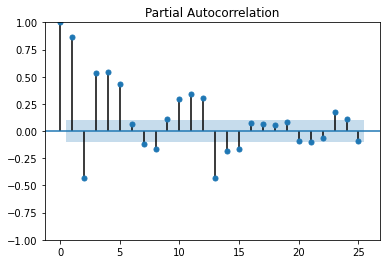

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

pacf = plot_pacf(df['IPG2211A2N'],lags=25)

**Split Dataset into Train and Test 
Testing: Last 7 days**

In [ ]:
train = X [:len(X)-7]
test = X [len(X)-7:]

**Here is how the summary will look like:**

In [ ]:
model = AutoReg(train,lags=15).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  390
Model:                    AutoReg(15)   Log Likelihood                -884.573
Method:               Conditional MLE   S.D. of innovations              2.560
Date:                Wed, 16 Nov 2022   AIC                           1803.147
Time:                        15:55:18   BIC                           1869.905
Sample:                            15   HQIC                          1829.650
                                  390                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7941      0.975      2.866      0.004       0.883       4.705
y.L1           0.5780      0.051     11.292      0.000       0.478       0.678
y.L2          -0.1369      0.059     -2.316      0.0

In [ ]:
print (len(train))

390


**Make prediction on test set and compare**

In [ ]:
pred = model.predict(start=len(train),end=len(X)-1,dynamic = False)

**Once the model is trained, the final step is to make the predictions and evaluate the predictions against the test data.**

[113.18307635 114.27775075 100.50071446  91.34003115  94.52592868
 109.84560828 113.10160517]


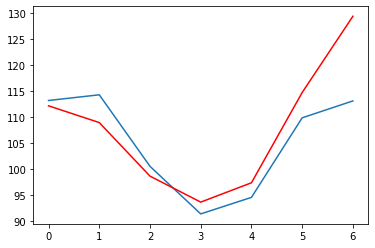

In [ ]:
from matplotlib import pyplot 
pyplot.plot(pred)
pyplot.plot(test,color='red')
print(pred)

**Calculate error**

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rsme = sqrt(mean_squared_error(test,pred))

In [ ]:
print(rsme)

6.926455395030688


**Making Future Prediction**

In [ ]:
pred_future=model.predict(start=len(X)+1,end=len(X)+7,dynamic=False)
print("The future prediction for the next week")
print(pred_future)
print("No. of predictions made: \t", len(pred_future))


The future prediction for the next week
[ 99.99252583  88.44632658  93.13684724 103.77430398 113.96186256
 113.4402748   99.91450516]
No. of predictions made: 	 7


In [ ]:
rsme = sqrt(mean_squared_error(pred,pred_future))

In [ ]:
print(rsme)

15.187718435264724


**Implement ARIMA Model**

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 14.8 MB/s 


In [ ]:
from pmdarima.arima import auto_arima
obj=auto_arima(df['IPG2211A2N'],trace='True',supress_warning='True',lags=15)
obj.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2750.050, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2691.759, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2624.463, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2748.185, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2625.508, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2525.516, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2493.118, Time=0.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2449.570, Time=0.37 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2449.577, Time=0.47 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2431.710, Time=0.51 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2431.461, Time=0.35 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2359.635, Time=0.56 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=2

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  397
Model:               SARIMAX(2, 1, 4)   Log Likelihood               -1021.370
Date:                Wed, 16 Nov 2022   AIC                           2058.740
Time:                        15:56:10   BIC                           2090.591
Sample:                    01-01-1985   HQIC                          2071.358
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1109      0.024      4.716      0.000       0.065       0.157
ar.L1          0.9986      0.002    507.261      0.000       0.995       1.002
ar.L2         -0.9993      0.001   -752.368      0.000      -1.002      -0.997
ma.L1         -1.3644      0.038    -35.661      0.000      -1.439      -1.289
ma.L2          0.9234      0.071     12.929      0.000       0.783       1.063
ma.L3          0.0063      0.071      0.087      0.930      -0.134       0.146
ma.L4         -0.4328      0.042    -10.243      0.000      -0.516      -0.350
sigma2         9.8902      0.635     15.574      0.000       8.646      11.135
===================================================================================
Ljung-Box (L1) (Q):                   1.04   Jarque-Bera (JB):                22.01
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               1.95   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train = X [:len(X)-30]
test = X [len(X)-30:]

In [ ]:
print (len(train))

367


In [ ]:
pred = model.predict(start=len(train),end=len(X)-1,dynamic = False)

[110.44317182 101.14431291  94.01971356  97.64518513 106.21218603
 116.6173865  114.61593991  97.57350631  86.61209893  90.70268133
 101.66788834 112.55580762 112.39257559 103.45175544  91.66310935
  94.03199368 104.22803141 120.62855495 106.57449978  93.43720808
  92.3973447   89.9369522  106.13980596 113.18307635 114.27775075
 100.50071446  91.34003115  94.52592868 109.84560828 113.10160517]


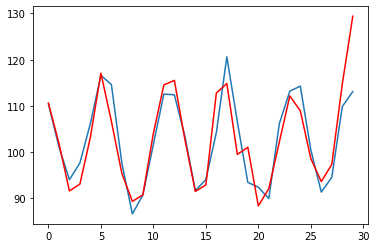

In [ ]:
from matplotlib import pyplot 
pyplot.plot(pred)
pyplot.plot(test,color='red')
print(pred)

**Calculate error**

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rsme = sqrt(mean_squared_error(test,pred))

In [ ]:
print(rsme)

4.899745510541729


**Making Future Prediction**

In [ ]:
pred_future=model.predict(start=len(X)+1,end=len(X)+30,dynamic=False)
print("The future prediction for the next week")
print(pred_future)
print("No. of predictions made: \t", len(pred_future))


The future prediction for the next week
[ 99.99252583  88.44632658  93.13684724 103.77430398 113.96186256
 113.4402748   99.91450516  91.96227724  95.34793399 108.28994544
 112.89303695 106.7235596   99.43064498  89.09937968  93.97515149
 104.95302122 114.54056783 112.80561641  99.80275656  92.37210208
  95.67418747 107.52049538 113.16452376 108.33243667  99.21036329
  89.85297481  94.63217245 105.83381274 114.93586906 112.38307351]
No. of predictions made: 	 30


In [ ]:
rsme = sqrt(mean_squared_error(pred,pred_future))

In [ ]:
print(rsme)

9.632753616925045


[ 99.99252583  88.44632658  93.13684724 103.77430398 113.96186256
 113.4402748   99.91450516  91.96227724  95.34793399 108.28994544
 112.89303695 106.7235596   99.43064498  89.09937968  93.97515149
 104.95302122 114.54056783 112.80561641  99.80275656  92.37210208
  95.67418747 107.52049538 113.16452376 108.33243667  99.21036329
  89.85297481  94.63217245 105.83381274 114.93586906 112.38307351]


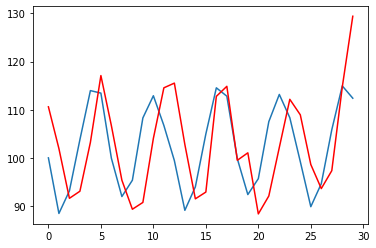

In [ ]:
from matplotlib import pyplot 
pyplot.plot(pred_future)
pyplot.plot(test,color='red')
print(pred_future)